In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import reionizer
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

import logging

logging.getLogger().setLevel(logging.WARNING)

# What is allocation of priorities on slits?

- [Final mask]()
- [Testing a few configs](#Testing-a-few-configs)

## Final mask

In [2]:
slits = pd.read_csv('masks/BLAS_1_slits.csv')
slits.columns
slits['extnum'] = slits.index + 1
slits

,slit,targetnum,name,ra,dec,pmra,pmdec,mag,priority,epoch,type,wave_start,wave_end,side,extnum
0,22,778,3DHST_15563,188.950745,62.218903,0,0,0.001,6,2000,TARGET,7728.533648,10251.126548,A,1
1,23,818,3DHST_16476,188.950455,62.223740,0,0,0.001,6,2000,TARGET,7698.929822,10221.535552,A,2
2,27,872,3DHST_17848,188.946426,62.230289,0,0,0.001,6,2000,TARGET,7652.275725,10174.901935,A,3
3,33,908,3DHST_19025,188.946198,62.235584,0,0,0.001,6,2000,TARGET,7620.071986,10142.712164,A,4
4,37,931,3DHST_19661,188.949158,62.238186,0,0,0.001,6,2000,TARGET,7609.846845,10132.491259,A,5
5,36,919,3DHST_19285,188.968842,62.237110,0,0,0.001,6,2000,TARGET,7652.164596,10174.789393,A,6
6,35,918,3DHST_19281,188.978577,62.236897,0,0,0.001,6,2000,TARGET,7671.224746,10193.840674,A,7
7,32,902,3DHST_18839,188.993240,62.234818,0,0,0.001,6,2000,TARGET,7710.485386,10233.083389,A,8
8,44,999,3DHST_21508,188.987457,62.247871,0,0,0.001,6,2000,TARGET,7621.921607,10144.558506,A,9
9,46,1033,3DHST_22052,188.994080,62.250793,0,0,0.001,6,2000,TARGET,7616.667809,10139.306658,A,10


high z: 103
low z: 69
1    18
2     2
3    44
5    41
6    69
Name: priority, dtype: int64


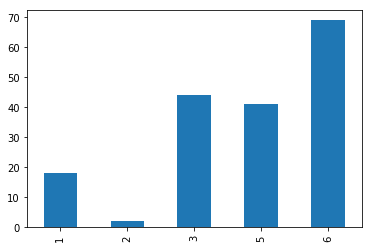

In [3]:
pri_counts = slits.priority.value_counts().sort_index()
pri_counts.sort_index()
pri_counts.plot.bar()
print('high z:', pri_counts[1] + pri_counts[3] + pri_counts[5])
print('low z:', pri_counts[6])

print(pri_counts)

In [7]:
pri1_slits = slits[slits.priority == 1]
pri1_slits.reset_index(drop=True, inplace=True)
pri1_slits

,slit,targetnum,name,ra,dec,pmra,pmdec,mag,priority,epoch,type,wave_start,wave_end,side,extnum
0,3,10,Stark11_43_3982,189.039261,62.247654,0,0,0.001,1,2000,TARGET,7718.780538,10241.372704,A,16
1,255,1916,f_3,188.910191,62.352588,0,0,0.001,1,2000,STANDARD,6855.558347,9378.533932,A,20
2,254,1915,f_2,188.902346,62.363999,0,0,0.001,1,2000,STANDARD,6773.112436,9296.124509,A,21
3,4,11,Jung18_z6_GND_5752,189.199585,62.320965,0,0,0.001,1,2000,TARGET,7592.815993,10115.463032,A,50
4,1,7,Hu10_z6_4,189.253998,62.353954,0,0,0.001,1,2000,TARGET,7509.007141,10031.694313,A,64
5,2,8,Stark11_35_22248,189.253998,62.353954,0,0,0.001,1,2000,TARGET,7509.007141,10031.694313,A,65
6,5,19,Stark11_35_22381,189.255386,62.357750,0,0,0.001,1,2000,TARGET,7489.939970,10012.635887,A,66
7,6,9,Hu10_z6_3,189.055939,62.129990,0,0,0.001,1,2000,TARGET,7402.424921,9925.164452,B,79
8,13,23,Stark11_42_6706,189.079712,62.141884,0,0,0.001,1,2000,TARGET,7421.763890,9944.492681,B,84
9,12,22,Stark11_41_13100,189.156693,62.115440,0,0,0.001,1,2000,TARGET,7115.139790,9638.003378,B,90


## Testing a few configs

In [ ]:
slits1 = pd.read_csv('masks/slits_17Pri1.csv')
slits1.columns

slits2 = pd.read_csv('masks/slitsV3.csv')
slits2.columns

slits3 = pd.read_csv('masks/slitsV4.csv')
slits3.columns

high z: 99
low z: 70
high z: 103
low z: 69


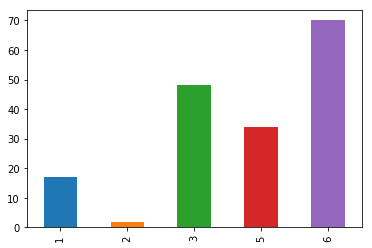

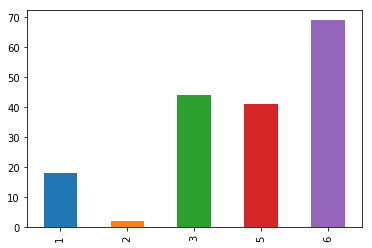

In [50]:
pri_counts1 = slits1.priority.value_counts().sort_index()
pri_counts1.sort_index()
pri_counts1.plot.bar()
print 'high z:', pri_counts1[1] + pri_counts1[3] + pri_counts1[5]
print 'low z:', pri_counts1[6]

# pri_counts2 = slits2.priority.value_counts().sort_index()
# pri_counts2.sort_index()
# plt.figure()
# pri_counts2.plot.bar()
# print 'high z:', pri_counts2[1] + pri_counts2[3] + pri_counts2[5]
# print 'low z:', pri_counts2[4]

pri_counts3 = slits3.priority.value_counts().sort_index()
pri_counts3.sort_index()
plt.figure()
pri_counts3.plot.bar()
print 'high z:', pri_counts3[1] + pri_counts3[3] + pri_counts3[5]
print 'low z:', pri_counts3[6]

In [93]:
?np.linspace()
?np.arange()